![my image caption](11.webp)

Congratulations, you have landed your first job as a data scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed. 
​
The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.
​
It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 
​
You will need to present your findings in format:
-  need to submit a technical report to your manager, who does have a strong technical data science background.
​
The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("event_venues.csv")

Let's start with the standard actions when analyzing a dataframe. Let's look at the data types, whether there are missing values and duplicates.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3910 non-null   object 
 1   Loud music / events         3910 non-null   bool   
 2   Venue provides alcohol      3910 non-null   int64  
 3   Wi-Fi                       3910 non-null   bool   
 4   supervenue                  3910 non-null   bool   
 5   U-Shaped_max                3910 non-null   float64
 6   max_standing                3910 non-null   int64  
 7   Theatre_max                 3910 non-null   float64
 8   Promoted / ticketed events  3910 non-null   bool   
 9   Wheelchair accessible       3910 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 172.0+ KB


In [4]:
df.columns =df.columns.str.lower().str.replace("/", "").str.replace(" ", "_").str.replace("__","_")
df['venue_provides_alcohol'] = df['venue_provides_alcohol'].astype(bool)

In [5]:
df.isna().sum()

venue_name                  0
loud_music_events           0
venue_provides_alcohol      0
wi-fi                       0
supervenue                  0
u-shaped_max                0
max_standing                0
theatre_max                 0
promoted_ticketed_events    0
wheelchair_accessible       0
dtype: int64

Our data has no missing values and has the correct column encoding.

In [6]:
df[df.duplicated()]

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible
44,wardour street,False,False,True,False,35.045455,8,112.715867,False,False
47,white collar factory,False,False,False,False,35.045455,0,112.715867,False,False
65,lloyds avenue,False,False,True,False,35.045455,0,112.715867,False,False
85,lloyds avenue,False,False,True,False,35.045455,0,112.715867,False,False
124,the king's head members club,False,True,False,False,35.045455,0,112.715867,True,False
...,...,...,...,...,...,...,...,...,...,...
3870,the deptford lounge,True,False,True,False,35.045455,0,7.000000,False,True
3880,107 cheapside,False,False,True,True,35.045455,0,112.715867,True,True
3891,30 euston square,False,True,True,False,35.045455,0,112.715867,False,True
3898,friends house,False,False,True,False,18.000000,0,30.000000,False,True



There are 450 values of complete duplicates in the DATA, let's get rid of them and look at the remaining data in more detail.

In [7]:
df = df.drop_duplicates()
df[df['venue_name']=="lloyds avenue"]

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible
6,lloyds avenue,False,False,True,False,35.045455,0,112.715867,False,False
1405,lloyds avenue,False,False,True,False,14.000000,0,30.000000,False,False



Looking at three different types of locations, it is clear that there are quite a lot of incomplete duplicates in the data. Since it was said in the conditions that the company is installing ramps in schools and offices, I understand that these are stationary ramps. I will make further analysis in this work based on this, because if it was assumed that the company was installing mobile ramps, then the columns of our dataframe that have numerical characteristics would be taken into account.

Since the company installs the ramp permanently at a specific location, I believe that it cannot be that the "wheelchair_accessible" column can have two different values. In this case, there is clearly some error in the data, or the dataframe entries were made at different times. In any case, we will assume in such controversial situations that the ramp is already standing in this place. In addition, there was a phrase in the conditions that said that contacting the location and specifying where the ramp is already installed is a blow to the reputation of the company.

In [8]:
df[df['venue_name']=="green rooms hotel"]

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible
1,green rooms hotel,True,True,True,False,40.000000,120,80.000000,True,False
3230,green rooms hotel,True,True,True,False,35.045455,120,112.715867,True,True
3455,green rooms hotel,True,True,True,False,15.000000,30,20.000000,True,True


As we can see, we have double values in the columns "wi-fi" and "wheelchair_accessible". I would do this with them, I would accept that if wi-fi and a ramp were already present at the location, then they are there, so we will change the value "False" to "True" where it is necessary.

In [9]:
res = pd.DataFrame()
for i in df.venue_name.unique():
    if len(set(list(df[df['venue_name'] == i]['wheelchair_accessible'])))>1:
        df1 = df[df['venue_name'] == i]
        df1.wheelchair_accessible = True
        res = res.append(df1)
    else:
        df2 = df[df['venue_name'] == i]
        res = res.append(df2)

In [10]:
res1 = pd.DataFrame()
for i in df.venue_name.unique():
    if len(list(set(res[res['venue_name'] == i]['wi-fi'])))>1:
        df1 = res[res['venue_name'] == i]
        df1['wi-fi'] = True
        res1 = res1.append(df1)
    else:
        df2 = res[res['venue_name'] == i]
        res1 = res1.append(df2)

In [11]:
res1 = res1.drop_duplicates()

After we have cleaned our data in the logical columns, we will proceed to cleaning the numeric columns. As we can see, these columns should be filled with integers, as they characterize the number of people at events. But some of the data in these columns is filled with fractional numbers. Perhaps these are the consequences of data migration or filling in the dataframe at an earlier stage. We also need to figure out how to deal with these columns to us. One option may be to fill the columns with the average value in each location, and then delete all duplicates.

In [12]:
result = pd.DataFrame()
for i in df.venue_name.unique():
    if len(list(res1[res1['venue_name'] == i]['wi-fi']))>1:
        df1 = res1[res1['venue_name'] == i]
        df1['u-shaped_max'] = df1['u-shaped_max'].mean().round(0)
        df1['max_standing'] = df1['max_standing'].mean().round(0)
        df1['theatre_max'] = df1['theatre_max'].mean().round(0)
        result = result.append(df1)
    else:
        df2 = res1[res1['venue_name'] == i]
        df2['u-shaped_max'] = df2['u-shaped_max'].round(0)
        df2['max_standing'] = df2['max_standing'].round(0)
        df2['theatre_max'] = df2['theatre_max'].round(0)
        result = result.append(df2)
result = result.drop_duplicates()

In [13]:
result = result.drop_duplicates(subset = ['venue_name'])
result.reset_index(inplace = True,  drop=True)

We have received the final dataframe with which we will perform further manipulations. There are almost 1,450 unique locations where various events take place.

Let's take a closer look at the processed data.

In [14]:
result.head()

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible
0,techspace aldgate east,False,False,True,False,35.0,0.0,113.0,False,True
1,green rooms hotel,True,True,True,False,30.0,90.0,71.0,True,True
2,148 leadenhall street,False,False,True,False,35.0,0.0,113.0,False,False
3,conway hall,False,False,True,False,30.0,45.0,67.0,False,True
4,gridiron building,False,False,True,False,28.0,0.0,58.0,False,False


In [15]:
result.describe()

,u-shaped_max,max_standing,theatre_max
count,1444.000000,1444.000000,1444.000000
mean,36.182133,124.783934,114.563712
std,41.620910,252.046243,142.095746
min,4.000000,0.000000,4.000000
25%,35.000000,30.000000,85.000000
50%,35.000000,75.000000,113.000000
75%,35.000000,135.250000,113.000000
max,1280.000000,5000.000000,4000.000000


In [16]:
result.query('max_standing > 1000').sort_values('max_standing')

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible
1116,harrow leisure centre,True,True,True,False,35.0,1050.0,1000.0,True,True
1323,seymour,True,False,True,False,35.0,1200.0,113.0,True,True
598,troxy,True,True,True,False,35.0,1500.0,2000.0,True,False
1253,alexandra palace,True,True,True,False,35.0,1650.0,1650.0,True,True
1277,white hart events park,True,False,True,False,900.0,1800.0,1200.0,True,True
301,magazine london,False,True,True,False,35.0,3128.0,833.0,True,True
989,the drumsheds,True,True,True,False,35.0,3375.0,113.0,True,True
1204,evolution london,True,False,False,False,35.0,4000.0,4000.0,True,True
958,national maritime museum grounds,True,True,False,False,35.0,5000.0,113.0,True,True


In [17]:
result[result['u-shaped_max'] > 1000]

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible
815,cabana @ stratford,True,False,True,False,1280.0,63.0,76.0,True,True


Looking at the places with the largest number of seats, we can say that almost all of them are equipped with ramps, and also that loud events are held in these places.

Let's build graphs for greater clarity and understanding of our functions.


Let's create another column with the total number of people at the location.

In [18]:
result['total_people'] = result['u-shaped_max']+result['max_standing']+result['theatre_max']
result.head()

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible,total_people
0,techspace aldgate east,False,False,True,False,35.0,0.0,113.0,False,True,148.0
1,green rooms hotel,True,True,True,False,30.0,90.0,71.0,True,True,191.0
2,148 leadenhall street,False,False,True,False,35.0,0.0,113.0,False,False,148.0
3,conway hall,False,False,True,False,30.0,45.0,67.0,False,True,142.0
4,gridiron building,False,False,True,False,28.0,0.0,58.0,False,False,86.0


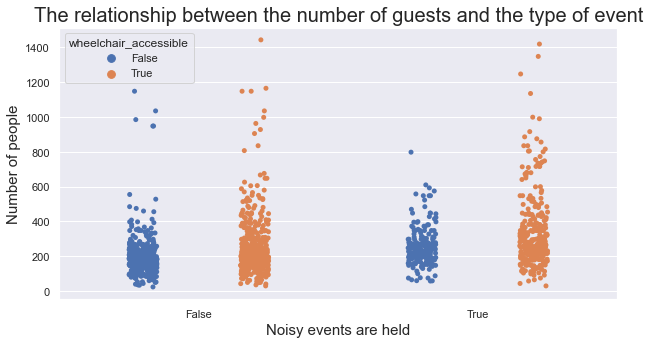

In [19]:
sns.set()
plt.figure(figsize = [10,5])
sns.stripplot(x="loud_music_events", y="total_people",dodge=True,hue="wheelchair_accessible", data=result.query('total_people <1500'))
plt.title("The relationship between the number of guests and the type of event", fontsize = 20)
plt.xlabel("Noisy events are held", fontsize = 15)
plt.ylabel("Number of people", fontsize = 15);

The graph shows that most locations can accommodate a total of less than 600 people. The number of places equipped with a ramp is large both for large and noisy events and for ordinary places.You can also see locations with a total capacity of more than 1000 people, almost all have ramps.

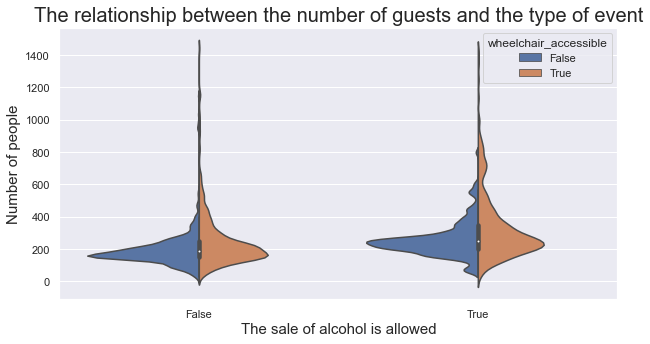

In [20]:
plt.figure(figsize = [10,5])
sns.violinplot(x='loud_music_events', y='total_people', data=result.query('total_people <1500'),hue='wheelchair_accessible', split=True,bw=0.15)
plt.title("The relationship between the number of guests and the type of event", fontsize = 20)
plt.xlabel("The sale of alcohol is allowed", fontsize = 15)
plt.ylabel("Number of people", fontsize = 15);


This graph is based on the same data as the previous one.But it clearly shows that the median of all locations by the total number of people is in the region of 200 people. It can be seen that where noisy events are held where there are no ramps, the number of guests is higher than in ordinary places.

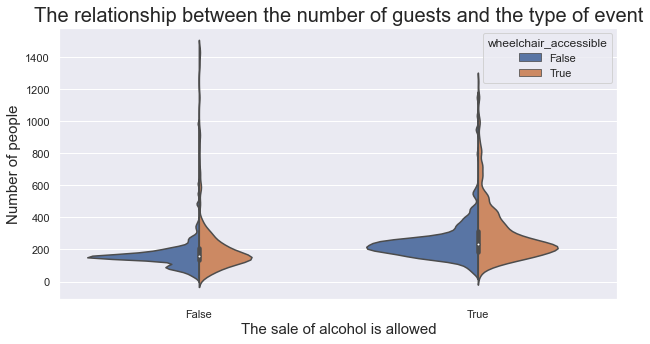

In [21]:
plt.figure(figsize = [10,5])
sns.violinplot(x='venue_provides_alcohol', y='total_people', data=result.query('total_people <1500'),hue='wheelchair_accessible', split=True,bw=0.15)
plt.title("The relationship between the number of guests and the type of event", fontsize = 20)
plt.xlabel("The sale of alcohol is allowed", fontsize = 15)
plt.ylabel("Number of people", fontsize = 15);


It can be seen that the data where the sale of alcohol is allowed are distributed approximately equally for sites and equipped with a ramp and not. There are almost half as many places and events without alcohol sales.

Let's look at the "super venue" where noisy events take place.

In [22]:
supervenue = result.query('supervenue == True' and 'loud_music_events  == True')
supervenue.head()

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible,total_people
1,green rooms hotel,True,True,True,False,30.0,90.0,71.0,True,True,191.0
5,kimpton fitzroy london,True,True,True,False,29.0,90.0,108.0,True,True,227.0
7,public space | members-style bar & dining,True,True,True,False,35.0,130.0,113.0,False,False,278.0
9,siorai bar,True,True,True,False,35.0,155.0,66.0,True,False,256.0
10,sway,True,True,True,False,35.0,194.0,126.0,False,False,355.0


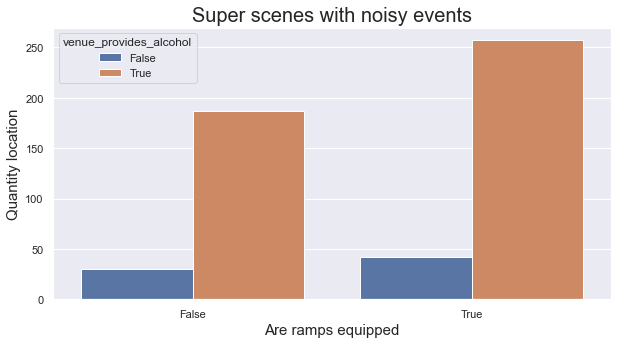

In [23]:
plt.figure(figsize = [10,5])
sns.countplot(data = supervenue, x = 'wheelchair_accessible', hue = 'venue_provides_alcohol');
plt.title("Super scenes with noisy events", fontsize = 20)
plt.xlabel("Are ramps equipped", fontsize = 15)
plt.ylabel("Quantity location", fontsize = 15);



Most of the "super venue", regardless of whether they sell alcohol or not, are equipped with ramps.

Let's look at the locations where the ramp is not installed.

In [24]:
not_ramp = result.query('wheelchair_accessible != True')
not_ramp

,venue_name,loud_music_events,venue_provides_alcohol,wi-fi,supervenue,u-shaped_max,max_standing,theatre_max,promoted_ticketed_events,wheelchair_accessible,total_people
2,148 leadenhall street,False,False,True,False,35.0,0.0,113.0,False,False,148.0
4,gridiron building,False,False,True,False,28.0,0.0,58.0,False,False,86.0
6,lloyds avenue,False,False,True,False,25.0,0.0,71.0,False,False,96.0
7,public space | members-style bar & dining,True,True,True,False,35.0,130.0,113.0,False,False,278.0
8,16 old queen street,False,False,True,False,35.0,0.0,113.0,False,False,148.0
...,...,...,...,...,...,...,...,...,...,...,...
889,the corn exchange,True,True,True,False,35.0,200.0,113.0,False,False,348.0
890,bella cosa restaurant,False,False,True,False,35.0,80.0,113.0,False,False,228.0
891,k-media studios,True,False,True,False,15.0,25.0,113.0,True,False,153.0
892,the buckle factory,False,False,True,True,35.0,60.0,113.0,False,False,208.0


In [ ]:
nrt = not_ramp.groupby(['loud_music_events','promoted_ticketed_events']).agg({'venue_name':['count']})
nrt

venue_name
                                                count
loud_music_events promoted_ticketed_events           
False             False                           361
                  True                             85
True              False                           109
                  True                            108

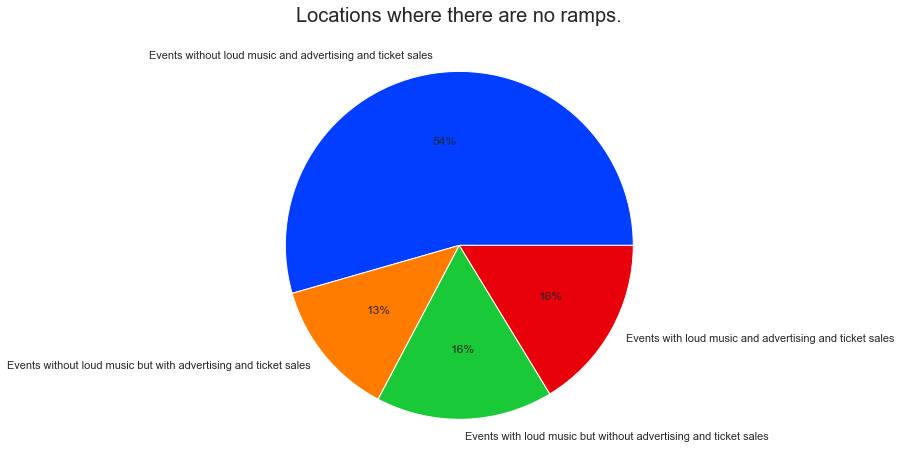

In [26]:
data = [361, 85, 109, 108]
labels = ['Events without loud music and advertising and ticket sales', 'Events without loud music but with advertising and ticket sales', 'Events with loud music but without advertising and ticket sales', 'Events with loud music and advertising and ticket sales']
colors = sns.color_palette('bright')
plt.figure(figsize = [10,8])
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title("Locations where there are no ramps.", fontsize = 20)

plt.show()

The schedule shows that events without noisy music and without ticket sales prevail in this dataframe, other events have approximately the same number of venues.

We got a little familiar with our data, but since the task was to "create a model" that predicts whether there is a ramp on the sites, we will not delve into data analysis. I will say a little about what I threw out of the final form of this project. During the analysis, I tried to load "en_core_web_lg" from the spacy module and analyze the locations in order to further group them by location type. However, since spacy defined locations as "organizations", there was not much sense in this. But I liked the idea itself, and if the purpose of the task was to analyze the data, and not to create a model, then it would be nice to "bring to life" the following concept:
- select features from the names of locations and create a separate column with them, i.e. if it is "green rooms hotel" then there would be an entry "hotel" in the column, for "siorai bar" it would be "bar" and plot our data depending on this new column.


Let's move on to building a model, but first we'll prepare the data to transfer it to our first model.

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
result["loud_music_events"] = ord_enc.fit_transform(result[["loud_music_events"]])
result["venue_provides_alcohol"] = ord_enc.fit_transform(result[["venue_provides_alcohol"]])
result["wi-fi"] = ord_enc.fit_transform(result[["wi-fi"]])
result["supervenue"] = ord_enc.fit_transform(result[["supervenue"]])
result["promoted_ticketed_events"] = ord_enc.fit_transform(result[["promoted_ticketed_events"]])
result["wheelchair_accessible"] = ord_enc.fit_transform(result[["wheelchair_accessible"]])


In [28]:
y = result.loc[:,"wheelchair_accessible"]
X =result.loc[:,['loud_music_events', 'venue_provides_alcohol', 'wi-fi',
       'supervenue', 'u-shaped_max', 'max_standing', 'theatre_max',
       'promoted_ticketed_events', 'total_people']]


In [29]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scaler = Scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.35,
random_state=1)


In [32]:
tree = DecisionTreeClassifier(max_depth=4,max_features= 8, random_state=1)
knn = KNeighborsClassifier(n_neighbors=35)
forest = RandomForestClassifier(max_depth=4,max_features= 5, random_state=1)
lr = LogisticRegression(C=0.7)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
forest.fit(X_train, y_train)
lr.fit(X_train,y_train)

tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test)
forest_pred = forest.predict(X_test)
lr_pred = lr.predict(X_test)

In [33]:
print("Accuracy of the tree model = %f" %accuracy_score(y_test, tree_pred) )
print(f"Confusion matrix :\n {confusion_matrix(tree_pred, y_test)}")

Accuracy of the tree model = 0.660079
Confusion matrix :
 [[172 104]
 [ 68 162]]


In [34]:
print("Accuracy of the knn model = %f" %accuracy_score(y_test, knn_pred) )
print(f"Confusion matrix :\n {confusion_matrix(knn_pred, y_test)}")

Accuracy of the knn model = 0.640316
Confusion matrix :
 [[166 108]
 [ 74 158]]


In [35]:
print("Accuracy of the forest model = %f" %accuracy_score(y_test, forest_pred) )
print(f"Confusion matrix :\n {confusion_matrix(forest_pred, y_test)}")

Accuracy of the forest model = 0.681818
Confusion matrix :
 [[158  79]
 [ 82 187]]


In [36]:
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test, lr_pred))
print(f"Confusion matrix :\n {confusion_matrix(lr_pred, y_test)}")

Accuracy of logistic regression classifier:  0.6462450592885376
Confusion matrix :
 [[139  78]
 [101 188]]


Average AUC Decision Tree Classifier : 0.650
Decision Tree Classifier: ROC AUC=0.704


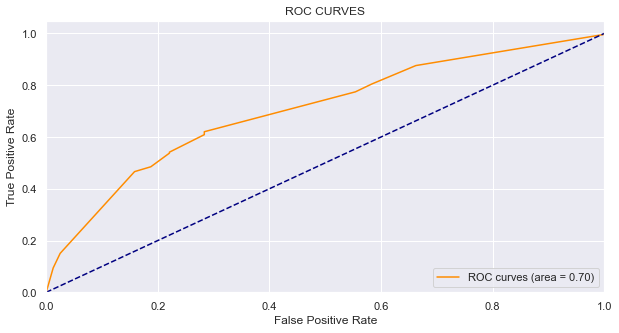

In [37]:
scores = cross_val_score(tree,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Average AUC Decision Tree Classifier : {scores.mean():.3f}")

tree_probs = tree.predict_proba(X_test)
tree_probs = tree_probs[:, 1]
tree_auc = roc_auc_score(y_test, tree_probs)
print('Decision Tree Classifier: ROC AUC=%.3f' % (tree_auc))
fpr, tpr, treshold = roc_curve(y_test, tree_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [10,5])
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curves (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')
plt.legend(loc="lower right")
plt.show()

Average AUC LogisticRegression : 0.634
LogisticRegression: ROC AUC=0.684


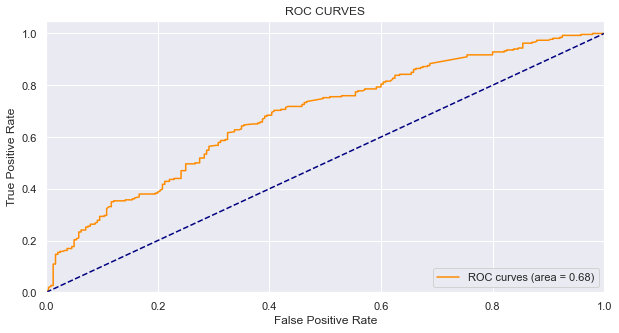

In [38]:
scores = cross_val_score(lr,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Average AUC LogisticRegression : {scores.mean():.3f}")

lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [10,5])
plt.plot(fpr, tpr,color='darkorange',
         label='ROC curves (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')

plt.legend(loc="lower right")
plt.show()

Average AUC Random Forest Classifier : 0.684
Random Forest Classifier: ROC AUC=0.737


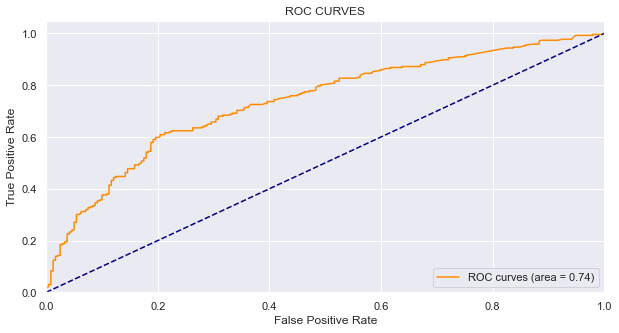

In [39]:
scores = cross_val_score(forest,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Average AUC Random Forest Classifier : {scores.mean():.3f}")


forest_probs = forest.predict_proba(X_test)
forest_probs = forest_probs[:, 1]
forest_auc = roc_auc_score(y_test, forest_probs)
print('Random Forest Classifier: ROC AUC=%.3f' % (forest_auc))
fpr, tpr, treshold = roc_curve(y_test, forest_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [10,5])
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curves (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')
plt.legend(loc="lower right")
plt.show()

After reviewing several models and trying to find suitable parameters for them, for its best performance, we got our best model (Random Forest Classifier) with an accuracy of about 74%. The accuracy of the model is not high in order to say that this is a good model, because we did not have enough data to train the model, and the data themselves do not say that they describe any features well enough for which it would be possible to "catch on" with the classification task.

It was quite an interesting binary classification problem. Unfortunately, I did not achieve high performance for the model, despite attempts to find solutions to it in various ways. In my opinion, there were several "slippery moments" in the data, such as:
1) the same location had different forms of filling in the data and the target variable;
2) the numerical data were filled with fractional values similar to some kind of average value;
Also, our data consisted mainly of logical values.

For future data, it would be good to collect more information with other different criteria and avoid all aspects described above.

Thank you for watching my work!